# About Dataset
##### Spotify Dataset contains 23 columns, each are:
- track_name: Displays the name of the songs.
- artist(s)_name: Displays the name of the artist that made the song.
- artist_count: Displays the number of artists that participated in the creation of the songs.
- released_year: Year that the song got released.
- released_month: Month that the song got released.
- released_day: Day that the song got released.
- in_spotify_playlists: Dysplays the number of times the song is in people's playlists.
- in_spotify_charts: Displays the number of times the song is in spotify's charts.
- streams: Displays the number of streams the song has beeen replayed in spotify.
- in_apple_playlists: Displays the number of times the song is in people's apple playlists.
- in_apple_charts: Displays the number of times the song is in apple's charts.
- in_deezer_playlists: Displays the number of times the song is in people's deezer playlists.
- in_deezer_charts: Displays the number of times the song is in deezer's charts.
- in_shazam_charts: Measures how energetic a song is.
- bpm: Measures the average beats per minute of a song.
- key: Displays the music key that the song is based of.
- mode: Displays the mode of the song.
- danceability_%: Shows how danceable the song is.
- valence_%: Displays the average rating of the song per individual.
- energy_%: Displays how energetic the song is.
- acousticness_%: Displays how acustic a song is.
- instrumentalness_% : Displays how instrumental a song is.
- liveness_%: Displays how lively the song is.
- speechness_%: Displays the level of speechness (how lyrical) of the song is.
###### But we added one new columns to be able to group by seasons:
- release_date: This is a concatenation of the three columns released_year, released_month, and released_day.

In [1]:
# Install and import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data set
data = pd.read_csv('spotify_2023.csv', encoding = 'ISO-8859-1', engine= 'python', parse_dates=['release_date'])
#visualize the top five rows in the data using the head function
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   released_month        953 non-null    int64         
 5   released_day          953 non-null    int64         
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               953 non-null    object        
 9   in_apple_playlists    953 non-null    int64         
 10  in_apple_charts       953 non-null    int64         
 11  in_deezer_playlists   953 non-null    int64         
 12  in_deezer_charts      953 non-null    int64         
 13  in_shazam_charts    

In [4]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,385.187828,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,2018-09-10 05:09:45.519412480
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-06-28 00:00:00
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,164.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,1130.535561,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,NaN


## Data Preprocesing
### Drop Missing data

In [5]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     94
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
release_date             0
dtype: int64

In [6]:
new_data = data.dropna(axis = 0, how = 'any')

In [7]:
print("Old data frame length:", len(data)) 
print("New data frame length:", len(new_data))  
print("Number of rows with at least 1 NA value: ", 
      (len(data)-len(new_data)))

Old data frame length: 953
New data frame length: 818
Number of rows with at least 1 NA value:  135


In [8]:
# Understanding the Stastics in the data set
new_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818
mean,1.567237,2018.463325,6.012225,13.694377,4858.897311,11.848411,60.454768,49.676039,372.121027,2.519560,58.729829,122.559902,67.396088,51.218826,64.366748,26.284841,1.674817,18.150367,10.522005,2018-11-30 13:05:08.068459776
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,2021.000000,3.000000,5.000000,829.750000,0.000000,12.000000,6.000000,13.000000,0.000000,0.000000,99.250000,57.000000,32.000000,53.250000,5.000000,0.000000,10.000000,4.000000,2021-01-18 06:00:00
50%,1.000000,2022.000000,5.000000,13.000000,2045.000000,3.000000,32.000000,34.500000,39.000000,0.000000,3.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,2022-05-06 00:00:00
75%,2.000000,2022.000000,9.000000,22.000000,4892.250000,16.000000,78.750000,84.000000,142.750000,2.000000,38.750000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,23.750000,12.000000,2022-12-01 18:00:00
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,532.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.875899,10.823803,3.574676,9.294159,7740.667475,18.953438,75.345835,49.877023,1156.468241,5.732745,157.095584,28.158008,14.680009,23.611446,16.098229,25.465282,8.762157,13.544094,10.214475,NaN


### Group By release_date

In [9]:
new_data.groupby(new_data['release_date'])

In [10]:
new_data.groupby(new_data['release_date'].map(lambda x: x.year))

In [11]:
date = new_data.groupby("release_date")["track_name"].count()

In [13]:
period_length = 20
start_year = 1940
end_year = 2023
new_data = new_data[(new_data['released_year'] >= 1940) & (new_data['released_year'] <= 2023)]

In [14]:
year_range = end_year - start_year
modulo = year_range % period_length
if modulo == 0:
    final_start = end_year - period_length
else:
    final_start = end_year - modulo
final_end = end_year + 1

In [15]:
starts = np.arange(start_year, final_start, period_length).tolist()

In [16]:
tuples = [(start, start+period_length) for start in starts]
# We'll add the last period calculated earlier
tuples.append(tuple([final_start, final_end]))
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

In [17]:
original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))

# The label dict when year range is 1940-2019
#{'[1940, 1960)': '1940 - 1959',
# '[1960, 1980)': '1960 - 1979',
# '[1980, 2000)': '1980 - 1999',
# '[2000, 2020)': '2000 - 2019'}

In [21]:
# Assign each row to a period
new_data.loc[:, 'PERIOD'] = pd.cut(new_data['released_year'], bins=bins, include_lowest=True, precision=0)

C:\Users\jonat\AppData\Local\Temp\ipykernel_12404\983774952.py:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='y', nbins=6)


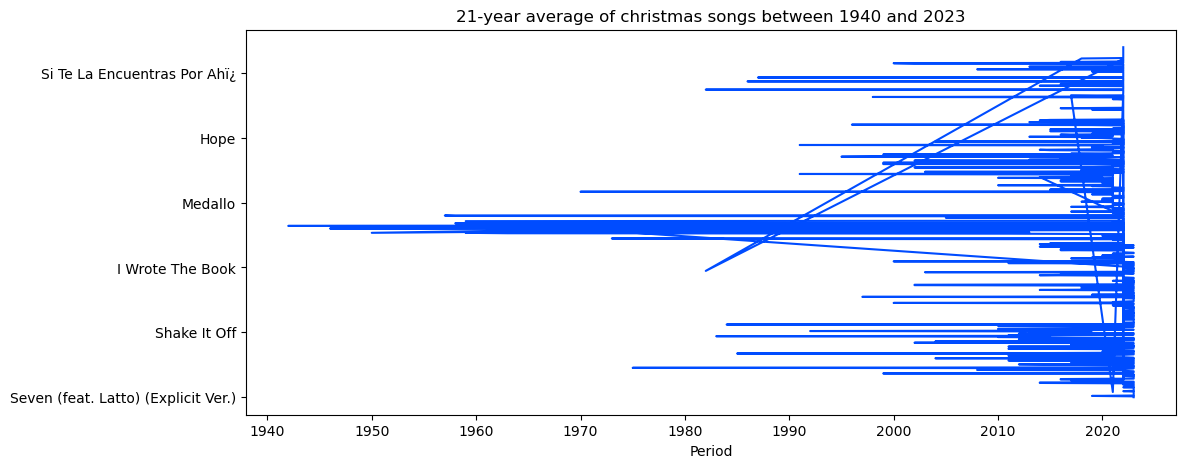

In [27]:
# Styling of the figure
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(5)
fig.patch.set_facecolor('white')
plt.plot(new_data['released_year'], new_data['track_name'], color='#004cff')
plt.title(f"21-year average of christmas songs between {start_year} and {end_year}")
plt.xlabel("Period") 
plt.ylabel("") 
# Styling of the plot
plt.grid(color = 'white', linewidth = 1)
plt.locator_params(axis='y', nbins=6)
# Styling of the axes
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

### Pairplot by release_date

In [ ]:
sns.pairplot(new_data, hue = 'released_year')
plt.show()